Current working directory: /Users/coffeepeanut/kaggle_projects/titanic-ml/notebooks
데이터 로드 성공
Train Shape: (891, 12)
Test Shape: (418, 11)


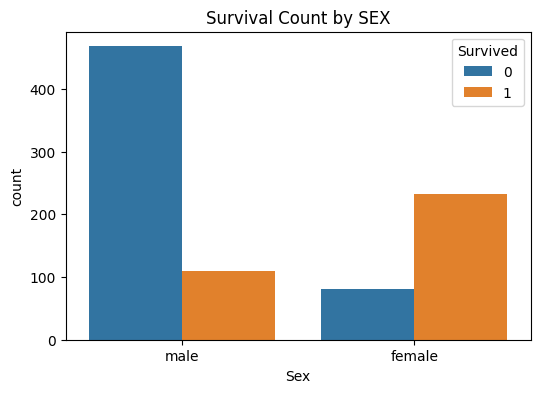

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 현재 경로 확인 (notebooks 폴더 안에서 실행되므로 상위 폴더로 나가야 함.)
print(f"Current working directory: {os.getcwd()}")

# 데이터 로드
train_path = "../data/train.csv"
test_path = "../data/test.csv"

try:
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    print("데이터 로드 성공")
    print(f"Train Shape: {df_train.shape}")
    print(f"Test Shape: {df_test.shape}")
    
    # 간단한 시각화 (성별에 따른 생존율)
    # figsize는 바탕 크기를 정하는 코드이다. (6인치, 4인치)
    plt.figure(figsize=(6, 4))
    # 실제 .csv에 있는 컬럼명을 줘야 하므로 대소문자를 가려야 한다. -> x축 y축에 이름 넣어주는건줄 알았음..
    # data=df_train -> 사용할 데이터는 df_train이라는 데이터프레임을 명시
    sns.countplot(data=df_train, x="Sex", hue="Survived")
    plt.title("Survival Count by SEX")
    plt.show()
    
except FileNotFoundError:
    print("No File")

In [2]:
# 결측치 개수 확인
print("Train Set 결측치: \n", df_train.isnull().sum())
print("-" * 20)
print("Test Set 결측치: \n", df_test.isnull().sum())

# 결측치 확인해 보면 나이같은 경우 결측치가 있긴 하지만 생존에 중요한 정보이므로 버리기 아깝끼 때문에 평균값이나 중간값을 넣어주면 된다.
# Cabin(객실 번호) 같은 경우 너무 많이 빠져있기도 하고 중요해보이지 않으므로 걍 버리는게 좋다.
# Embarked(탑승 항구)같은 경우 2개밖에 안 비어 있으니 아무거나(가장 많이 탄 항구)로 채우면 된다.

Train Set 결측치: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
Test Set 결측치: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [3]:
# 결측치 Embarked를 채우기 위한 갯수 세기
print(df_train['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [4]:
# 1. 나이 채우기 (중간값 이용)
# fillna()함수는 NaN값을 괄호 안의 값으로 채워줌
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

# 2. Embarked 채우기: 가장 많이 나온 'S'항구로 채움 (하드코딩)
df_train['Embarked'] = df_train['Embarked'].fillna('S')

# 3. Cabin 버리기
# axis=1은 'Column'을 지운다는 뜻이다.
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

print("결측치 처리 완료")
print(df_train.isnull().sum())

결측치 처리 완료
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [5]:
# 문자를 숫자로 변호나
# male -> 0, female -> 1
# Embarked: S->0, C->1, Q->2

# 1. 성별(Sex) 변환
sex_mapping = {'male': 0, 'female': 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

# 2. 탑승항구(Embarked) 변환
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

# 결과 확인
print(df_train[['Sex', 'Embarked']].head())

   Sex  Embarked
0    0         0
1    1         1
2    1         0
3    1         0
4    0         0


In [6]:
# 불필요한 데이터 버리기
drop_cols = ['Name', 'Ticket']
df_train = df_train.drop(drop_cols, axis=1)
df_test = df_test.drop(drop_cols, axis=1)

print("최종 데이터 형태:", df_train.shape)
# 이제 모든 데이터가 숫자 형태임
df_train.head()

최종 데이터 형태: (891, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [7]:
# 모든 컬럼이 숫자(int, float)인지 확인
print(df_train.info())
print("-" * 20)
print(df_test.info())

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
None
--------------------
<class 'pandas.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 n

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import numpy as np

# 테스트셋 결측치도 채우기
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_train['Fare'].median())

# 학습에 필요없는 PassengerId제거 및 Survived분리
X_data = df_train.drop(['PassengerId', 'Survived'], axis=1)
y_data = df_train['Survived']

# 테스트용 데이터에서도 PassengerId제거 ( 나중에 제출할 때 ID필요하므로 따로 저장 )
test_passenger_ids = df_test['PassengerId']
X_test_submission = df_test.drop(['PassengerId'], axis=1)

# 데이터 스케일링 (StandardScaler)
# Age와 Fare의 단위 차이를 없애줌
scaler = StandardScaler()

# 학습 데이터 기준으로 스케일링 학습 후 변환(transform)
X_data_scaled = scaler.fit_transform(X_data)
# 제출용 테스트 데이터도 똑같은 기준으로 변환
X_test_submission_scaled = scaler.transform(X_test_submission)

# Pandas/Numpy 데이터를 PyTorch텐서로 변환
# 딥러닝은 기본 float32 사용
X_tensor = torch.tensor(X_data_scaled, dtype=torch.float32)
# unsqueeze(1): 모델 출력 모양이 (N, 1)이므로 모양을 맞추기 위해 정답 부분도 (N, 1)로 맞추는 작업
y_tensor = torch.tensor(y_data.values, dtype=torch.float32).unsqueeze(1)
X_test_submission_tensor = torch.tensor(X_test_submission_scaled, dtype=torch.float32)

# 학습용과 검증용으로 나눠서 모델이 제대로 학습 했는지 확인
X_train, X_val, y_train, y_val = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

print(f"학습 데이터 크기: {X_train.shape}")
print(f"검증 데이터 크기: {X_val.shape}")
print("데이터 준비 완료")

학습 데이터 크기: torch.Size([712, 7])
검증 데이터 크기: torch.Size([179, 7])
데이터 준비 완료


In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 1. 장치 설정 (GPU 있으면 GPU, 없으면 CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 장치: {device}")

# 2. 입력 사이즈 자동 계산 (아까 만든 X_train 사용)
# X_train.shape을 해보면 (712, 7)이 나오는데 여기서 7부분을 가져오기 위해 X_train.shape[1]로 함.
input_size = X_train.shape[1] 

# 3. 모델 정의
class TitanicNet(nn.Module):
    def __init__(self):
        super(TitanicNet, self).__init__()
        
        self.layers = nn.Sequential(
            # [입력 -> 은닉1]
            nn.Linear(input_size, 32),
            nn.ReLU(),
            
            # [은닉1 -> 은닉2]
            nn.Linear(32, 16),
            nn.ReLU(),
            
            # [은닉2 -> 은닉3]
            nn.Linear(16, 8),
            nn.ReLU(),
            
            # [은닉3 -> 출력]
            nn.Linear(8, 1),
            nn.Sigmoid() # 0~1 사이 확률값 배출
        )
        
    def forward(self, x):
        return self.layers(x)
    
# 모델 생성 및 장치로 이동
model = TitanicNet().to(device)
X_train = X_train.to(device) # 데이터도 장치로 이동
y_train = y_train.to(device)

print("모델 설계 완료:", model)

# ------------------------------------------------
# 학습 설정
# ------------------------------------------------
learning_rate = 0.01
criterion = nn.BCELoss() # 이진 분류 손실함수
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

epochs = 1000
loss_history = []

model.train() # 학습 모드 전환

print("학습 시작!!")

for epoch in range(epochs):
    # 1. 순전파
    y_pred = model(X_train)
    
    # 2. 오차 계산
    loss = criterion(y_pred, y_train)
    
    # 3. 역전파 (기울기 계산)
    optimizer.zero_grad() 
    loss.backward()
    
    # 4. 가중치 갱신
    optimizer.step()
    
    # 로그 기록
    loss_history.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch[{epoch+1}/{epochs}] | Loss: {loss.item():.4f}")

print("학습 종료!")

사용 중인 장치: cpu
모델 설계 완료: TitanicNet(
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
학습 시작!!
Epoch[100/1000] | Loss: 0.3180
Epoch[200/1000] | Loss: 0.2509
Epoch[300/1000] | Loss: 0.2234
Epoch[400/1000] | Loss: 0.2147
Epoch[500/1000] | Loss: 0.2053
Epoch[600/1000] | Loss: 0.2240
Epoch[700/1000] | Loss: 0.2007
Epoch[800/1000] | Loss: 0.1875
Epoch[900/1000] | Loss: 0.1851
Epoch[1000/1000] | Loss: 0.1983
학습 종료!


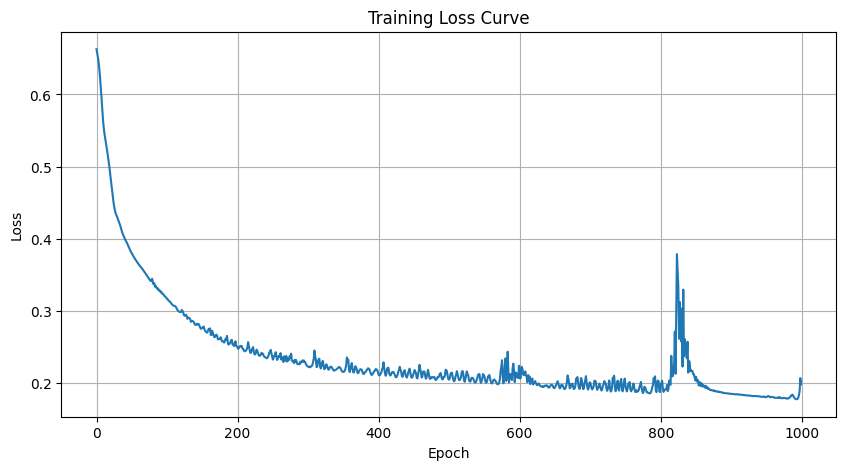

예측 완료
생존자 수 예측: 133명 / 전체 418명
예측 결과 앞 10개: [0 0 0 0 0 0 1 0 1 0]
저장 완료: ../data/submission_pytorch_1.csv


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

# 1. 학습 Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 2. 모델 평가 모드 전환 (매우 중요!)
# Dropout이나 Batch Normalization 기능을 끕니다.
model.eval()

# 3. 예측 진행
with torch.no_grad(): # 기울기 계산 끄기 (메모리 절약, 속도 향상)
    # [수정 1] 변수명을 아까 만든 'X_test_submission_tensor'로 변경
    # [수정 2] .to(device)를 붙여서 모델이 있는 곳(GPU)으로 데이터 이동
    X_input = X_test_submission_tensor.to(device)
    
    y_test_pred = model(X_input)
    
    # 0.5보다 크면 1(생존), 작으면 0(사망)으로 변환
    prediction_labels = (y_test_pred > 0.5).int()
    
    # 다시 CPU로 가져와서 Numpy 배열로 변환 후 1차원으로 펴기
    final_predictions = prediction_labels.cpu().numpy().flatten()
    
print("예측 완료")
print(f"생존자 수 예측: {sum(final_predictions)}명 / 전체 {len(final_predictions)}명")
print(f"예측 결과 앞 10개: {final_predictions[:10]}")

# 4. 제출 파일 만들기
# 아까 저장해둔 test_passenger_ids 사용
submission = pd.DataFrame({
    "PassengerId": test_passenger_ids, 
    "Survived": final_predictions
})

# 5. CSV 저장
save_path = "../data/submission_pytorch_1.csv"
submission.to_csv(save_path, index=False)

print(f"저장 완료: {save_path}")